# Homework 3

### Importing libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import numpy as np
import lime
from lime.lime_tabular import LimeTabularExplainer

### Loading data

With readable category names (for each variable).

In [8]:
data = np.genfromtxt('../../HW1/dataset_24_mushroom.csv', delimiter=',', dtype='<U20', skip_header=1)
labels = data[:,-1]
label_encoder = LabelEncoder()
label_encoder.fit(labels)
labels = label_encoder.transform(labels)
class_names = label_encoder.classes_
data = data[:,:-1]

categorical_features = list(range(22))


categorical_names = """1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s  
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y  
4. bruises?: bruises=t,no=f  
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s  
6. gill-attachment: attached=a,descending=d,free=f,notched=n  
7. gill-spacing: close=c,crowded=w,distant=d  
8. gill-size: broad=b,narrow=n  
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y  
10. stalk-shape: enlarging=e,tapering=t  
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?  
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s  
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s  
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
16. veil-type: partial=p,universal=u  
17. veil-color: brown=n,orange=o,white=w,yellow=y  
18. ring-number: none=n,one=o,two=t  
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z  
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y  
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y  
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d""".split('\n')

feature_names = []
for ind, line in enumerate(categorical_names):
    vals = line.strip().split('. ')[1]
    feature_name, values = vals.split(': ')
    feature_names.append(feature_name.strip())
    values = {x.split('=')[1]: x.split('=')[0] for x in values.split(',')}
    data[:,ind] = np.array([values[x.strip("'")] for x in data[:,ind]])
    
categorical_names = {}
for feature in categorical_features:
    label_encoder = LabelEncoder()
    label_encoder.fit(data[:, feature])
    data[:, feature] = label_encoder.transform(data[:, feature])
    categorical_names[feature] = label_encoder.classes_
    
data = data.astype(int)

In [9]:
classifier = RandomForestClassifier()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Running classification

I use a random forest with default parameters.

In [11]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

### Evaluating on training set

The prediction is perfect on training set.

In [12]:
print(classification_report(classifier.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



### Evaluating on test set

The prediction is perfect on the test set also.

In [13]:
print(classification_report(classifier.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Creating an explainer

I use `LimeTabularExplainer`, which is a suitable one for tabular data like this.

In [14]:
explainer = LimeTabularExplainer(data, 
                                 feature_names=feature_names, 
                                 class_names=['edible', 'poisonous'],
                                 categorical_features=categorical_features,
                                 categorical_names=categorical_names
                                )

In [15]:
class_names = ['edible', 'poisonous']

Looking at a couple of observations (two poisonous, two edible). 

I don't know why the plots appear twice, looks like library's fault.

Idx: 5
Prediction: poisonous


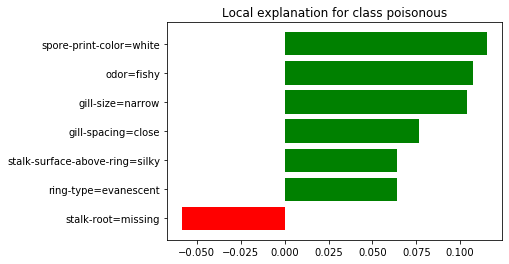

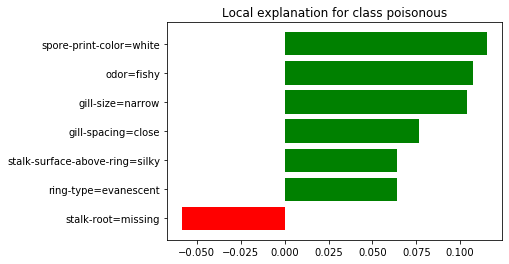

In [63]:
idx = 5

exp = explainer.explain_instance(X_test[idx, :], classifier.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Idx: 65
Prediction: poisonous


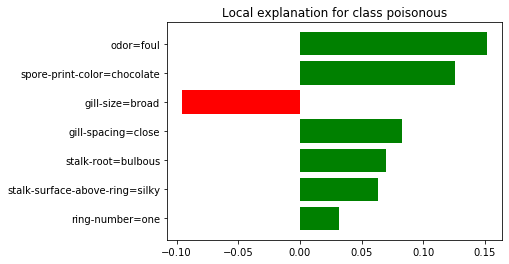

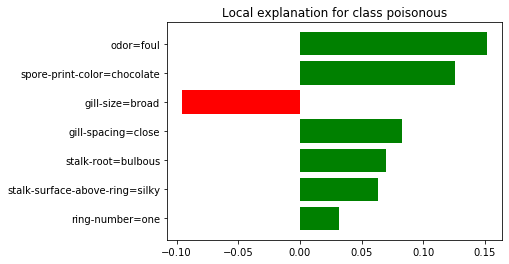

In [72]:
idx = 65


exp = explainer.explain_instance(X_test[idx, :], classifier.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Idx: 16
Prediction: edible


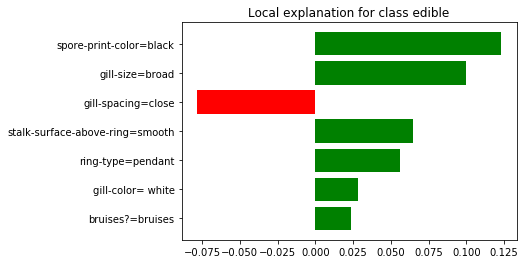

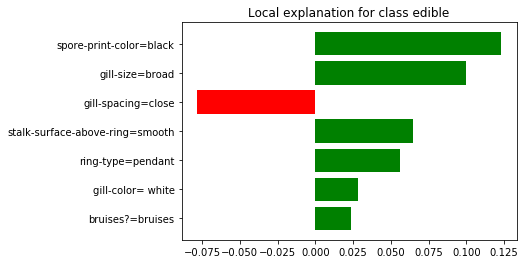

In [65]:
idx = 16


exp = explainer.explain_instance(X_test[idx, :], classifier.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Idx: 350
Prediction: edible


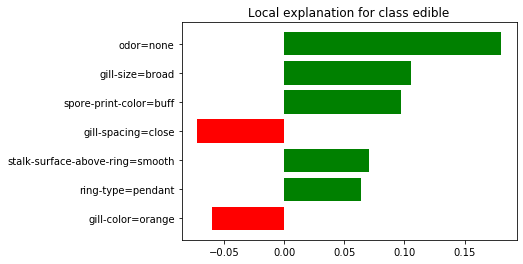

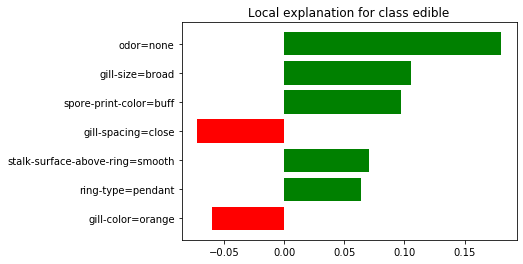

In [66]:
idx = 350


exp = explainer.explain_instance(X_test[idx, :], classifier.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Looks like the presence of odor and some (chocolate and white) spore print colors are indicators of a poisonous mushroom.

On the other hand, the lack of odor, black and buff spore print color and broad gill size indicate an edible mushroom.

In general, `odor`, `gill-size`, `spore-print-color` and `gill-spacing` look the most important (judging from the feature lists).

### Second classifier

I'll use a basic neural network (the default one has one layer with 100 nodes, uses Adam optimizer and ReLU activation).

In [57]:
classifier2 = MLPClassifier()
classifier2.fit(X_train, y_train)

MLPClassifier()

The results are as good as with the random forest.

In [58]:
print(classification_report(classifier2.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [59]:
print(classification_report(classifier2.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Let's explain the same instances.

Idx: 5
Prediction: poisonous


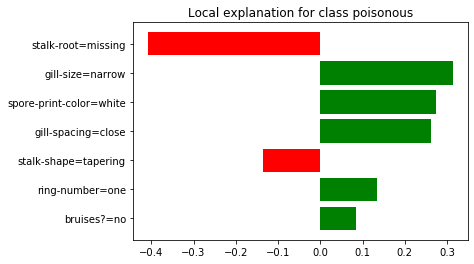

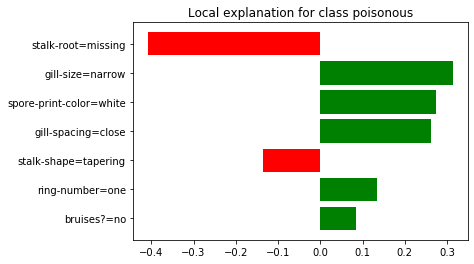

In [67]:
idx = 5

exp = explainer.explain_instance(X_test[idx, :], classifier2.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Idx: 65
Prediction: poisonous


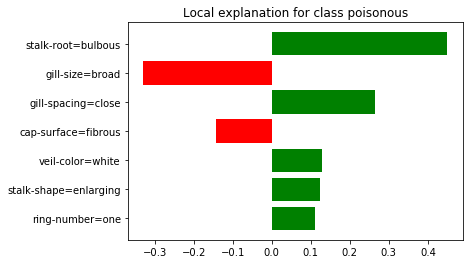

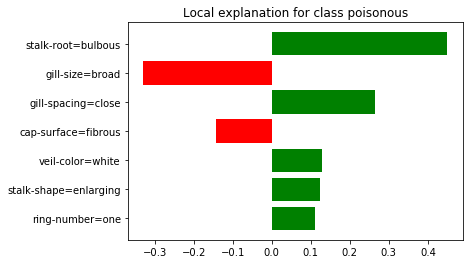

In [68]:
idx = 65


exp = explainer.explain_instance(X_test[idx, :], classifier2.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Idx: 16
Prediction: edible


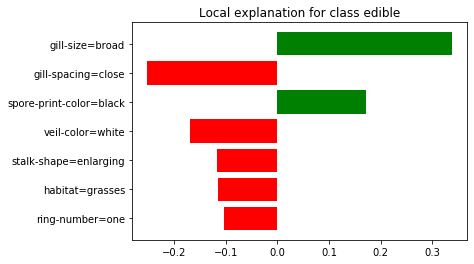

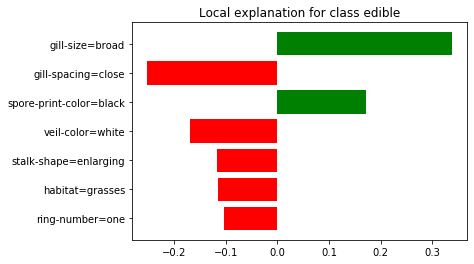

In [69]:
idx = 16


exp = explainer.explain_instance(X_test[idx, :], classifier2.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

Idx: 350
Prediction: edible


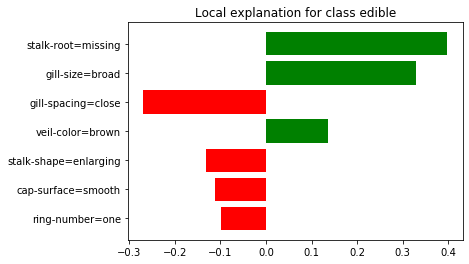

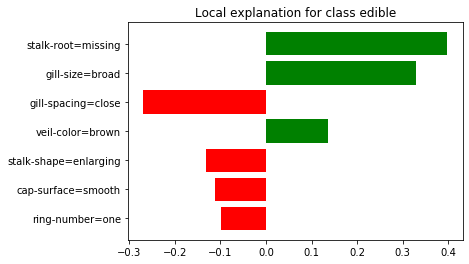

In [70]:
idx = 350


exp = explainer.explain_instance(X_test[idx, :], classifier2.predict_proba, num_features=7, labels=[0, 1])
print(f'Idx: {idx}')
print('Prediction:', class_names[y_test[idx]])
exp.as_pyplot_figure(label=y_test[idx])

The most important features differ more from instance to instance than in the case of random forest. Also, odor appears much less frequently. A type of stalk root seems to be the most important feature, as well as gill size and gill spacing. A color of the spore print is important in two instances.

~~For the last instance (indice 350), something interesting happens – a neural network model thinks a buff spore print color indicates that a mushroom is poisonous, whereas random forest predicts the opposite.~~

Sadly, the above was true only for one specific neural network initialization and training – I wasn't able to reproduce that later.

All of this shows that most important features can differ across models for the same instance.

Maybe the consistency of variable importance in RF is connected to the way RF uses a subset of features on each split. 